# Visualizing sample images from the dataset
## Importing the UCI ML hand-written digits dataset

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [4]:
print(digits)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ..

In [5]:
print(digits.images.shape)

(1797, 8, 8)


In [6]:
indices = []
for i in range(10):
    for j in digits.target:
        if i==j:
            indices.append(j)
            break
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


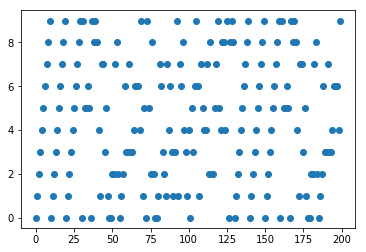

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(list(range(200)),digits.target[:200])
plt.show()

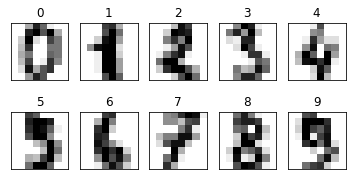

In [8]:
import matplotlib.pyplot as plt

nrows, ncols = 2, 5
plt.figure(figsize=(6,3))

for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.imshow(digits.images[i],cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])

---
# Exploring the data nature by t-SNE method

In [9]:
from sklearn.manifold import TSNE

---
# Creating a Convolutional Neural Network to recognize digits 

In [10]:
import numpy as np
X = np.vstack([digits.data[digits.target==i]for i in range(10)])
y = np.hstack([digits.target[digits.target==i] for i in range(10)])

In [11]:
%%timeit
#Here we run tSNE with 250 iteractions and time it
tsne_iter_250 = TSNE(init='pca',method='exact',n_components=2,n_iter=250).fit_transform(X)

53.9 s ± 4.13 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
tsne_iter_250 = TSNE(init='pca',method='exact',n_components=2,n_iter=250).fit_transform(X)

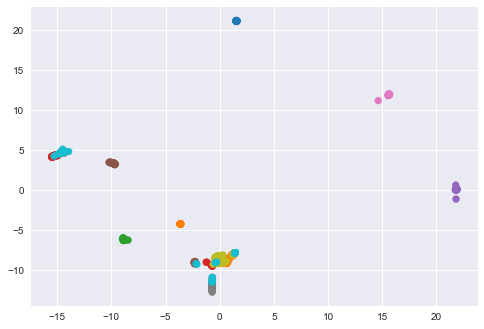

In [13]:
#We import the pandas and matplotlib libraries
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn')
#Here we plot the tSNE results in a reduced two-dimensional space
df = pd.DataFrame(tsne_iter_250)
plt.scatter(df[0],df[1],c=y,cmap=matplotlib.cm.get_cmap('tab10'))
plt.show()

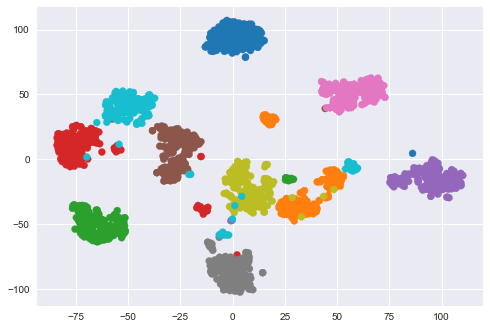

In [14]:
#Here we run tSNE for 2000 iteractions
tsne_iter_2000 = TSNE(init='pca',method='exact',n_components=2,n_iter=2000).fit_transform(X)
#Here we plot the figure
df2 = pd.DataFrame(tsne_iter_2000)
plt.scatter(df2[0],df2[1],c=y,cmap=matplotlib.cm.get_cmap('tab10'))
plt.show()

---
# Creating a Convolutional Neural Network to recognize digits

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
X = np.expand_dims(digits.images.T, axis=0).T
y = lb.fit_transform(digits.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
# Import sklearn models for preprocessing input data
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer

# Import the necessary Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History 

# Randomize and split data into training dataset with right format to feed to Keras
lb = LabelBinarizer()
X = np.expand_dims(digits.images.T, axis=0).T
y = lb.fit_transform(digits.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Start a Keras sequential model
model = Sequential()

# Set input format shape as (batch, height, width, channels)
K.set_image_data_format('channels_last') 

model.add(Convolution2D(filters=4,kernel_size=(3,3),padding='same',input_shape=(8,8,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Drop out 5% of training data in each batch
model.add(Flatten())
model.add(Dropout(0.05))
model.add(Dense(10, activation= 'softmax'))

# Set variable 'history' to store callbacks to track the validation loss
history = History()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and save the callbacks of validation loss and accuracy to 'history'
model.fit(X_train,y_train, epochs=100, batch_size= 128, callbacks=[history])

Using TensorFlow backend.


Epoch 1/100
1437/1437 [==============================] - 0s - loss: 8.1692 - acc: 0.0682     
Epoch 2/100
1437/1437 [==============================] - 0s - loss: 6.1486 - acc: 0.0891     
Epoch 3/100
1437/1437 [==============================] - 0s - loss: 4.9665 - acc: 0.0953     
Epoch 4/100
1437/1437 [==============================] - 0s - loss: 4.3481 - acc: 0.1113     
Epoch 5/100
1437/1437 [==============================] - 0s - loss: 3.6783 - acc: 0.1580     
Epoch 6/100
1437/1437 [==============================] - 0s - loss: 3.1635 - acc: 0.2164     
Epoch 7/100
1437/1437 [==============================] - 0s - loss: 2.7373 - acc: 0.2568     
Epoch 8/100
1437/1437 [==============================] - 0s - loss: 2.4488 - acc: 0.3173     
Epoch 9/100
1437/1437 [==============================] - 0s - loss: 2.2028 - acc: 0.3633     
Epoch 10/100
1437/1437 [==============================] - 0s - loss: 1.8948 - acc: 0.4196     
Epoch 11/100
1437/1437 [==============================] - 0

1437/1437 [==============================] - 0s - loss: 0.1942 - acc: 0.9346     
Epoch 88/100
1437/1437 [==============================] - 0s - loss: 0.1982 - acc: 0.9318     
Epoch 89/100
1437/1437 [==============================] - 0s - loss: 0.1878 - acc: 0.9422     
Epoch 90/100
1437/1437 [==============================] - 0s - loss: 0.1916 - acc: 0.9290     
Epoch 91/100
1437/1437 [==============================] - 0s - loss: 0.2054 - acc: 0.9325     
Epoch 92/100
1437/1437 [==============================] - 0s - loss: 0.1831 - acc: 0.9408     
Epoch 93/100
1437/1437 [==============================] - 0s - loss: 0.1776 - acc: 0.9457     
Epoch 94/100
1437/1437 [==============================] - 0s - loss: 0.1832 - acc: 0.9346     
Epoch 95/100
1437/1437 [==============================] - 0s - loss: 0.1727 - acc: 0.9402     
Epoch 96/100
1437/1437 [==============================] - 0s - loss: 0.1785 - acc: 0.9478     
Epoch 97/100
1437/1437 [==============================] - 0s - 

# Evaluating prediction results with visualizations

In [17]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


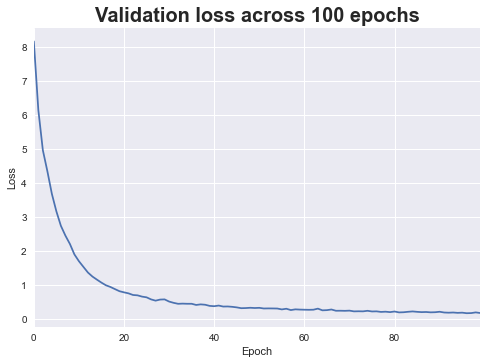

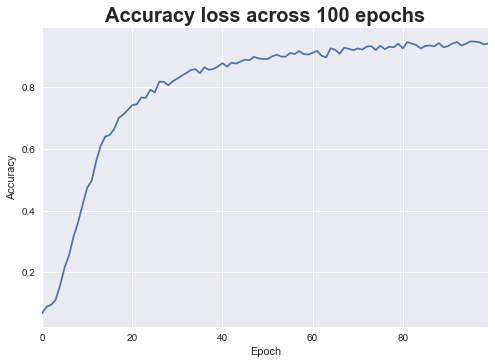

In [18]:
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn')

# Here plots the loss function graph along Epochs
pd.DataFrame(history.history['loss']).plot()
plt.legend([])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation loss across 100 epochs',fontsize=20,fontweight='bold')
plt.show()

# Here plots the percentage of accuracy along Epochs
pd.DataFrame(history.history['acc']).plot()
plt.legend([])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy loss across 100 epochs',fontsize=20,fontweight='bold')
plt.show()

---
## Examining the prediction performance for each digit 

In [19]:
y_test1 = model.predict(X_test)
y_test1 = lb.fit_transform(np.round(y_test1))
y_test1 = np.argmax(y_test1, axis=1)
y_test = np.argmax(y_test, axis=1)

In [20]:
import numpy as np
mislabeled_indices = np.arange(len(y_test))[y_test!=y_test1]
true_labels = np.asarray([y_test[i] for i in mislabeled_indices])
predicted_labels = np.asarray([y_test1[i] for i in mislabeled_indices])
print(mislabeled_indices)
print(true_labels)
print(predicted_labels)

[  0  56  80 117 134 135 146 189 192 198 202 237 291 294 323 335]
[9 8 1 4 8 2 8 8 4 8 9 3 7 6 8 8]
[8 5 0 9 0 0 0 0 9 1 0 7 9 8 9 3]


In [21]:
mislabeled_digit_counts = [len(true_labels[true_labels==i]) for i in range(10)]
mislabeled_digit_counts 

[0, 1, 1, 1, 2, 0, 1, 1, 7, 2]

In [22]:
total_digit_counts = [len(y_test[y_test==i]) for i in range(10)]
total_digit_counts

[42, 32, 41, 32, 36, 35, 40, 39, 27, 36]

In [23]:
mislabeled_ratio = [mislabeled_digit_counts[i]/total_digit_counts[i] for i in range(10)]
mislabeled_ratio

[0.0,
 0.03125,
 0.024390243902439025,
 0.03125,
 0.05555555555555555,
 0.0,
 0.025,
 0.02564102564102564,
 0.25925925925925924,
 0.05555555555555555]

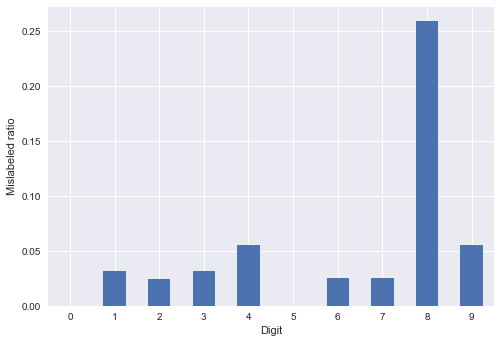

In [24]:
pd.DataFrame(mislabeled_ratio).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Digit')
plt.ylabel('Mislabeled ratio')
plt.legend([])
plt.show()

---
## Extracting the falsely predicted images

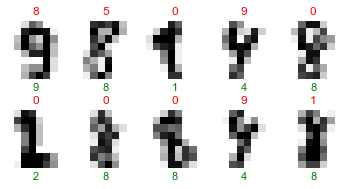

In [25]:
import matplotlib.pyplot as plt
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
for i in range(ncols * nrows):
    j = mislabeled_indices[i]
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.imshow(X_test[j].reshape(8,8),cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_test1[j],color='red')
    plt.xlabel(y_test[j],color='green')
plt.show()